<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Layers and Filters

**Convolution Operations, Filters, and Feature Maps**

- What is a Convolution Operation?

  - Mathematical operation where a small matrix (kernel or filter) slides over the input image to extract features like edges, textures, or patterns
  
  - Key Concepts
  
    - Kernel (Filter)
    
       -  A small matrix (EX: 3x3 3x3) used to extract features
  
       -  Each element of the kernel is a weight learned during training
    
    - Feature Map
    
      - The output of a convolution operation.
      
      - Highlights specific patterns detected by the filter
    - Channels:
    
      - For RGB images, convolution processes each color channel separately and combines results

**Concepts of Kernel Size, Stride, and Padding**

- Kernel Size

  - The dimensions of the filter (EX: 3x3 3x3, 5x5 5x5)

  - Smaller Kernels: Capture fine details

  - Larger Kernels: Detect broader features

- Stride

  - Defines the step size of the filter as it slides across the input

  - Larger Strides: Reduce the feature map size, improving computation efficiency

  - Smaller Strides: Retain more detail but increase computation

- Padding

  - Adds extra pixels around the input to control the size of the output

  - Valid Padding: No padding; the feature map shrinks

  - Same Padding: Adds enough padding to keep the output size equal to the input size

**Visualizing How COnvolution Extracts Fetures**

- Edge Detection

  - Kernal like Sobel or Prewitt highlight edges in images

- Feature Extraction

  - Initial layers focus on edges: Deeper layers capture abstract patterns

**Objective**

- Understand convolution operations by implementing and visualizing their effects using TensorFlow and PyTorch

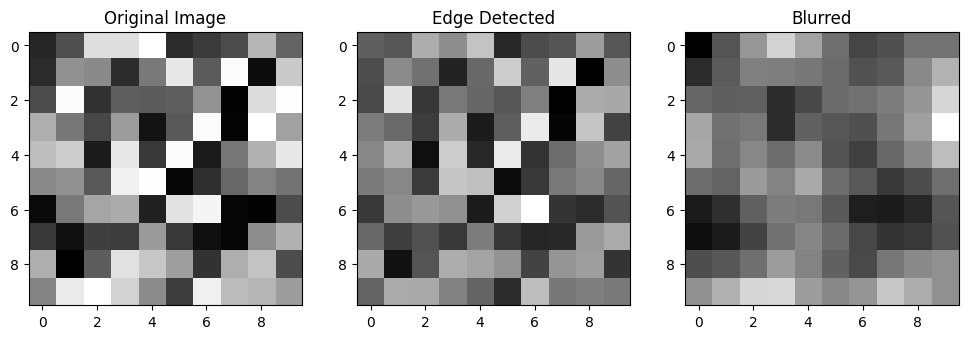

Original Shape:(1, 10, 10, 1)
Output Shape:(1, 10, 10, 1)
Original Shape:torch.Size([1, 1, 10, 10])
Output Shape:torch.Size([1, 1, 10, 10])
Large kernel Output shape:(1, 10, 10, 1)
Stride Output Shape:torch.Size([1, 1, 5, 5])


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve

# Load a sample grayscale image
image = np.random.rand(10, 10)

# Print Image

# Define Convolution kernels(filters)
edge_detection_kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
])

bblur_kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9

# Apply Convolution
edge_detected_image = convolve(image, edge_detection_kernel)
blurred_image = convolve(image, blur_kernel)

# Visualize original and filtered image
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image")
axes[1].imshow(edge_detected_image, cmap="gray")
axes[1].set_title("Edge Detected")
axes[2].imshow(blurred_image, cmap="gray")
axes[2].set_title("Blurred")
plt.show()

import tensorflow as tf

# Create a sample input tensor (batch_size, height, width, channels)
# Reshape the numpy image to be compatible with TensorFlow Conv2D layer (batch, height, width, channels)
image_tensor = tf.convert_to_tensor(image[np.newaxis, ..., np.newaxis], dtype=tf.float32)

conv_layer = tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same"
)

# Applying convolution
output_tensor = conv_layer(image_tensor)

print(f"Original Shape:{image_tensor.shape}")
print(f"Output Shape:{output_tensor.shape}")

import torch
import torch.nn as nn

# Create a sample input tensor(batch_size, channels, height, width)
image_tensor_pt = torch.randn(1, 1, 10, 10)

# Define a convolutional layer
conv_layer_pt = nn.Conv2d(
    in_channels = 1,
    out_channels = 1,
    kernel_size = 3,
    stride = 1,
    padding = 1
)

# Apply Convolution
output_tensor_pt = conv_layer_pt(image_tensor_pt)

print(f"Original Shape:{image_tensor_pt.shape}")
print(f"Output Shape:{output_tensor_pt.shape}")

# TensorFlow Example
conv_layer_large_kernel = tf.keras.layers.Conv2D(filters=1, kernel_size=(5, 5), strides=(1, 1), padding="same")
output_large_kernel = conv_layer_large_kernel(image_tensor)

print(f"Large kernel Output shape:{output_large_kernel.shape}")

# PyTorch Example
conv_layer_stride_2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1)
output_stride_2 = conv_layer_stride_2(image_tensor_pt)

print(f"Stride Output Shape:{output_stride_2.shape}")